In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn import metrics, datasets
from math import sqrt

In [4]:
iris = datasets.load_iris()

In [5]:
X = iris.data
y = iris.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
print("Amostras para treinamento: ", len(X_train))
print("Amostras para testes: ",len(X_test))

Amostras para treinamento:  105
Amostras para testes:  45


In [19]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,3), random_state =1)

In [20]:
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(prediction)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [21]:
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


In [22]:
print('Acurácia: ', metrics.accuracy_score(prediction, y_test))
print('MSE: ', metrics.mean_squared_error(prediction, y_test))
print('RMSE: ', sqrt(metrics.mean_squared_error(prediction, y_test)))

Acurácia:  0.9777777777777777
MSE:  0.022222222222222223
RMSE:  0.14907119849998599


In [23]:
# Getting learning curve
train_sizes, train_scores, valid_scores = learning_curve(clf, X, y, cv=10)

/home/pedro/Github/Venvs/tcc-tf/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [24]:
# Sample amount at training
print(train_sizes)

[ 13  43  74 104 135]


In [25]:
print(train_scores)

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         0.97115385 0.98076923 0.90384615 0.97115385
  0.89423077 0.98076923 1.         0.99038462]
 [0.97777778 0.98518519 0.99259259 0.99259259 0.99259259 0.99259259
  1.         0.99259259 0.99259259 0.97777778]]


In [26]:
print(valid_scores)

[[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
  0.33333333 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
  0.33333333 0.33333333 0.33333333 0.33333333]
 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
  0.66666667 0.66666667 0.66666667 0.66666667]
 [1.         1.         0.93333333 1.         0.8        1.
  0.86666667 0.86666667 1.         0.73333333]
 [1.         1.         1.         1.         0.86666667 1.
  0.86666667 1.         1.         1.        ]]


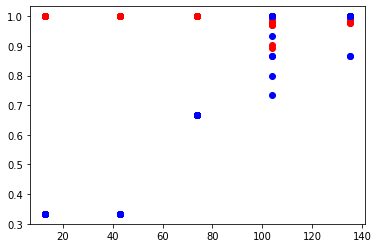

In [27]:
plt.plot(train_sizes, train_scores, 'ro')
plt.plot(train_sizes, valid_scores, 'bo')
plt.show()

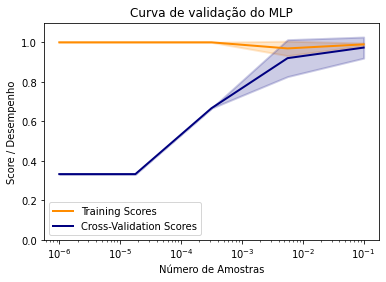

In [28]:
# Mesmo grafico só que fodastico, tah, nem tando
param_range = np.logspace(-6,-1,5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Curva de validação do MLP")
plt.xlabel("Número de Amostras")
plt.ylabel("Score / Desempenho")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label="Training Scores", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-Validation Scores", color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.2, color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Acurácia:  0.9777777777777777
MSE:  0.022222222222222223
RMSE:  0.14907119849998599


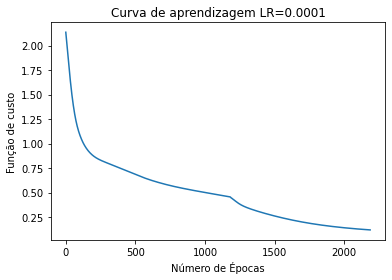

In [31]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5), random_state=1, max_iter=5000)
clf.fit(X, y)

print('Acurácia: ', metrics.accuracy_score(prediction, y_test))
print('MSE: ', metrics.mean_squared_error(prediction, y_test))
print('RMSE: ', sqrt(metrics.mean_squared_error(prediction, y_test)))

plt.title("Curva de aprendizagem LR="+str(0.0001))
plt.ylabel("Função de custo")
plt.xlabel("Número de Épocas")
plt.plot(clf.loss_curve_)
plt.show()

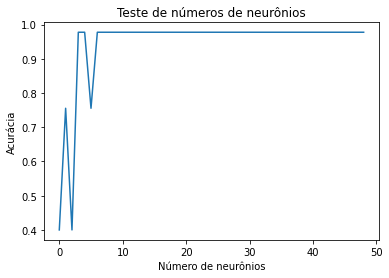

In [32]:
n_max = 50
acc = []
for i in range(1, n_max):
    clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(i), random_state=1, max_iter=5000)
    clf.fit(X, y)
    prediction = clf.predict(X_test)
    acc.append(metrics.accuracy_score(prediction, y_test))
    
plt.title("Teste de números de neurônios")
plt.ylabel("Acurácia")
plt.xlabel("Número de neurônios")
plt.plot(acc)
plt.show()